In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

In [2]:
# matplotlib.rcParams.update({'font.size': 20})

In [3]:
model_dir = Path("./models/")
result_dir = Path("./result/")
fig_dir = Path("./paper/")
if not fig_dir.exists():
    fig_dir.mkdir()

In [4]:
def plot_model(model, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
#     plt.figure(figsize=(12,8))
    plt.figure()
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['vp'].T/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    if src:
        plt.plot(x[receiver[0][0]][0]/1e3-x0, y[receiver[0][1]][0]/1e3, color="w", linewidth=2)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*', markersize=12, alpha=1.0)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight', dpi=300)
    plt.show()

In [5]:
def plot_result(result, model, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
#     plt.figure(figsize=(12,8))
    plt.figure()
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    if src:
        plt.plot(x[receiver[0][0]][0]/1e3-x0, y[receiver[0][1]][0]/1e3, color="w", linewidth=2)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*', markersize=12, alpha=1.0)
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k", linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight', dpi=300)
    
    ## slice
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(10,4))
    plt.figure()
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True")
        plt.plot(result.T[idx[i],:]/1e3, y/1e3, label=fig_name.split("/")[-1].split("_")[0])
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize="x-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)
    plt.gcf().text(0.5, 0., 'Velocity (km/s)', ha='center', va="top", fontsize='x-small')
    plt.show()

In [6]:
def plot_std(std, vp, model, model_true, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    std = std
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    
#     plt.figure(figsize=(12,8))
    plt.figure()
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, np.abs(vp.T-model_true["vp"]).T/1e3,
                        vmax=np.max(np.abs(vp.T-model_true["vp"]).T)/1e3*0.6, rasterized=True, shading='auto', cmap=cmap)
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k",  linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_err.pdf"), bbox_inches='tight', dpi=300)
    
#     plt.figure(figsize=(12,8))
    plt.figure()
    if (vmax is not None) and (vmin is not None):
        im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    else:
        im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, rasterized=True, shading='auto', cmap=cmap)
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k", linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_std.pdf"), bbox_inches='tight', dpi=300)    
    
    ## slice
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(10,4))
    plt.figure()
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model_true["vp"][idx[i],:]/1e3, y/1e3, label="True")
        plt.plot(vp.T[idx[i],:]/1e3, y/1e3, label=fig_name.split("/")[-1].split("_")[0])
#         plt.errorbar(vp.T[idx[i],:]/1e3, y/1e3, xerr=std.T[idx[i],:]/1e3, label=fig_name.split("/")[-1].split("_")[0])
        plt.fill_betweenx(y/1e3, vp.T[idx[i],:]/1e3-std.T[idx[i],:]/1e3, vp.T[idx[i],:]/1e3+std.T[idx[i],:]/1e3, color="gray",  alpha=0.6)
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
#             plt.legend(fontsize="x-small")
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)#, fontsize="x-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)
    plt.gcf().text(0.5, 0., 'Velocity (km/s)', ha='center', va="top")#, fontsize='x-small')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_profile.pdf"), bbox_inches='tight', dpi=300)    
    plt.show()

In [7]:
def plot_slice(subdirs, model, smooth_model, fig_name, names=None,  src=False, vmax=None, vmin=None, cmap="jet"):
    
    fnames = []
    results = []
    for subdir in subdirs:
        fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
        loss = np.loadtxt(fname, delimiter=",")
        fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
        fnames.append(fname)
        results.append(np.loadtxt(fname))
    
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
    
    linestyles = ["-.", "--", ":", (0, (3, 5, 1, 5, 1, 5)),]
    linewidths = [2, 2, 3, 3]
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(8,5))
    plt.figure()
    for i in range(len(idx)):
        
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True", alpha=1.0)#, linewidth=2)
        for j in range(len(subdirs)):
            if names is None:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=subdirs[j].split("/")[0], 
                         linestyle=linestyles[j])#, linewidth=linewidths[j])
            else:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=names[j], 
                         linestyle=linestyles[j])#, linewidth=linewidths[j])
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
#             plt.legend(fontsize="xx-small")
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)#, fontsize="small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)

    plt.gcf().text(0.5, 0.00, 'Velocity (km/s)', ha='center', va="top")#, fontsize='small')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight', dpi=300)
    
    plt.show()

In [8]:
def plot_subdir(subdir, model_true, cmap="jet", std=False, model_smooth=None, vmax_std=None, vmin_std=None):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.figure()
    plt.semilogy(loss[:,0], loss[:,1])

    fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
    print(f"loading {len(loss)//10} {fname}")
    inv_result = np.loadtxt(fname)
    plot_result(inv_result, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin, cmap=cmap)

    if std:
        std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[len(loss)//10-1]
        std = np.loadtxt(std)
        plot_std(std, inv_result, model_smooth, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax_std, vmin=vmin_std)#, cmap=cmap)

    return inv_result

In [9]:
def MSE(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    print(f"MSE = {mse}")
    return mse

def SSIM(x, y):
    k1 = 0.01
    k2 = 0.03
    vmax = np.max(x)
    vmin = np.min(x)
    μx = np.mean(x)
    μy = np.mean(y)
    σx = np.sqrt(np.mean((x-μx)**2))
    σy = np.sqrt(np.mean((y-μy)**2))
    σxy = np.mean((x-μx)*(y-μy))
    c1 = ( k1 * (vmax-vmin) )**2
    c2 = ( k2 * (vmax-vmin) )**2
    ssim = (2*μx*μy + c1) * (2*σxy + c2) / ((μx**2 + μy**2 + c1) * (σx**2 + σy**2 + c2))
#     print((2*μx*μy + c1), (μx**2 + μy**2 + c1),(2*σxy + c2), (σx**2 + σy**2 + c2))
    print(f"SSIM = {ssim}")
    return ssim

def PSNR(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    vmax = np.max(x)
    vmin = np.min(x)
    maxI = vmax - vmin
    psnr = 20.0 * np.log10(maxI) - 10.0 * np.log10(mse)
    print(f"PSNR = {psnr}")
    return psnr

def metrics(x, y):
    mse = MSE(x, y)
    ssim = SSIM(x, y)
    psnr = PSNR(x, y)

In [10]:
model_true_BP = sio.loadmat(model_dir.joinpath("BP-model-true.mat"))
model_smooth_BP = sio.loadmat(model_dir.joinpath("BP-model-smooth.mat"))

In [11]:
receiver = model_true_BP['receiver'][0][0][0]
source = model_true_BP['source'][0]
vmax = np.max(model_true_BP['vp'])/1e3
vmin = np.min(model_true_BP['vp'])/1e3

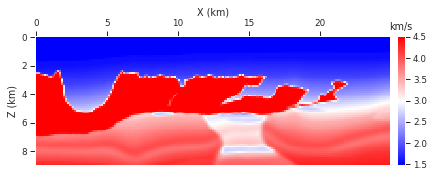

MSE = 0.0
SSIM = 1.0000000000000002
PSNR = inf


/home/users/zhuwq/.local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


In [12]:
plot_model(model_true_BP, "BP_model_true", fig_dir, src=False, cmap="bwr")
metrics(model_true_BP["vp"].T, model_true_BP["vp"].T)

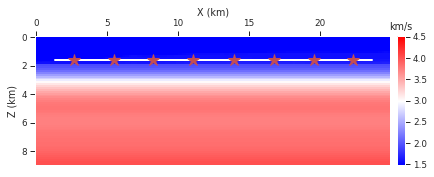

MSE = 617.705644458312
SSIM = 0.8364880555493307
PSNR = 41.70381933690109


In [13]:
plot_model(model_smooth_BP, "BP_model_smooth", fig_dir, src=True, vmax=vmax, vmin=vmin, cmap="bwr")
metrics(model_true_BP["vp"].T, model_smooth_BP["vp"].T)

loading 500 result/FWI/BP/inv_04990.txt


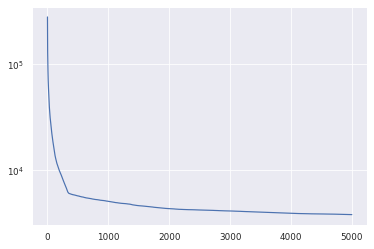

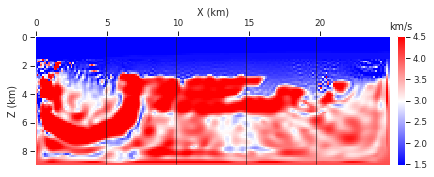

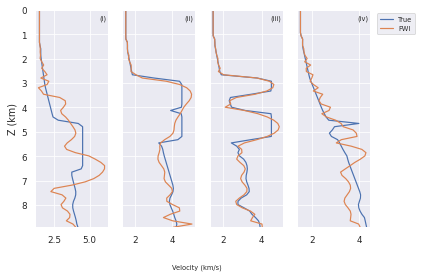

MSE = 622.4831849393125
SSIM = 0.8662328316207655
PSNR = 41.670358791498714


In [14]:
subdir = "FWI/BP"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_TV_2/inv_04990.txt


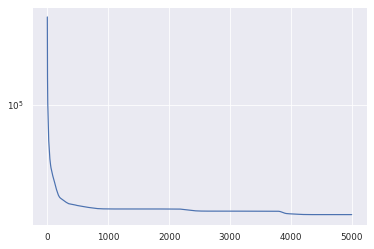

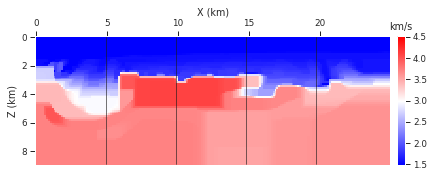

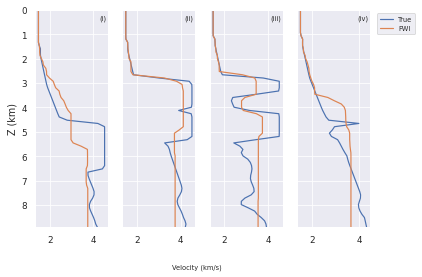

MSE = 494.2025263676953
SSIM = 0.90135910818829
PSNR = 42.67258542344408


In [15]:
subdir = "FWI/BP_TV_2"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_TV_3/inv_04990.txt


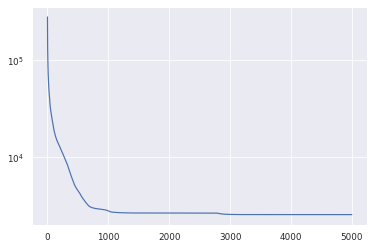

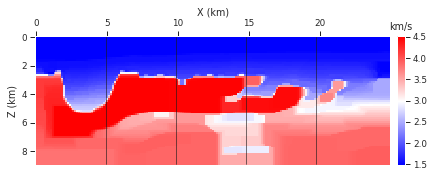

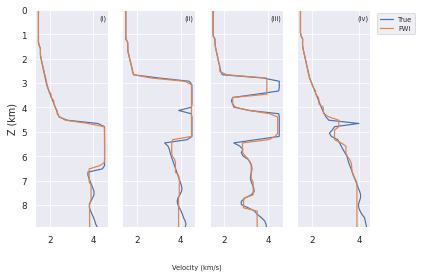

MSE = 180.60965904153488
SSIM = 0.9883182647793625
PSNR = 47.04422530777017


In [16]:
subdir = "FWI/BP_TV_3"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_TV_4/inv_04990.txt


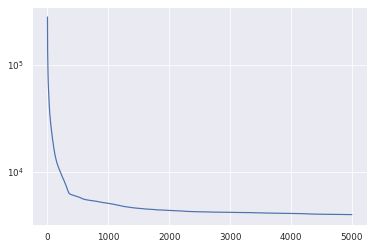

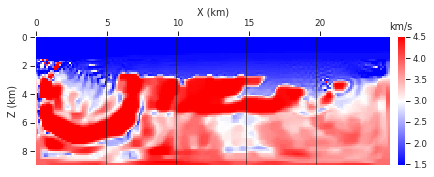

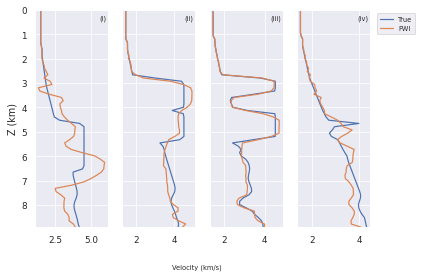

MSE = 567.8792553054401
SSIM = 0.8869512820645744
PSNR = 42.069074993875724


In [17]:
subdir = "FWI/BP_TV_4"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

In [18]:
# subdir = "FWI/BP_noise05"
# model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
# metrics(model_true_BP["vp"].T, model_inv)

In [19]:
# subdir = "FWI/BP_noise10"
# model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
# metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_adam/inv_04990.txt


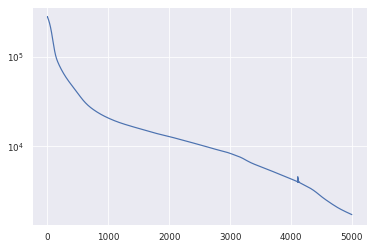

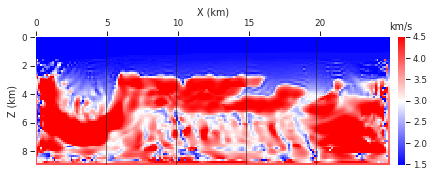

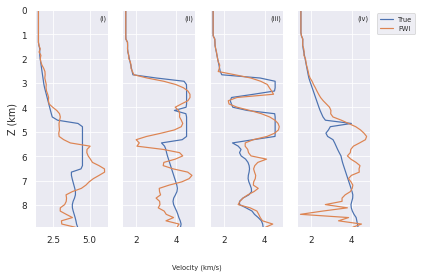

MSE = 734.0697611106231
SSIM = 0.8265593918495546
PSNR = 40.95426169195321


In [20]:
subdir = "FWI/BP_adam"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 1100 result/NNFWI/BP/inv_10990.txt


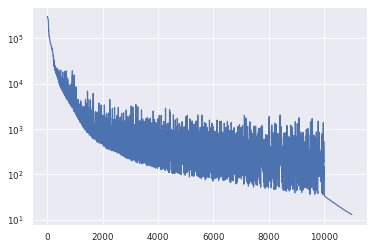

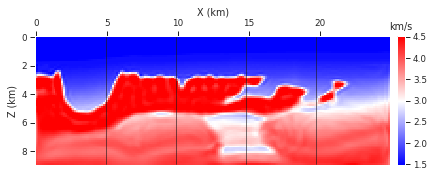

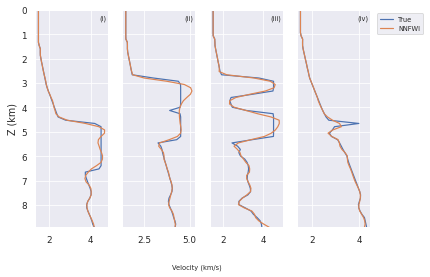

MSE = 134.44149495251676
SSIM = 0.9934795637749219
PSNR = 48.32630170473679


In [21]:
subdir = "NNFWI/BP"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
# model_inv = plot_subdir(subdir, model_true_BP)
metrics(model_true_BP["vp"].T, model_inv)

In [22]:
# subdir = "FWI/BP_adam"
# model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
# # model_inv = plot_subdir(subdir, model_true_BP)
# metrics(model_true_BP["vp"].T, model_inv)

loading 1100 result/NNFWI/BP_5/inv_10990.txt


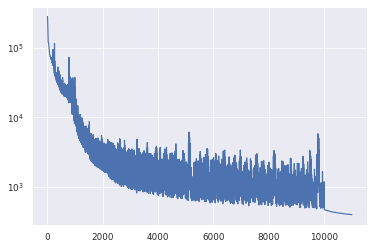

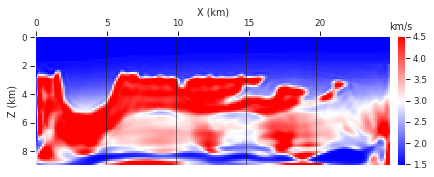

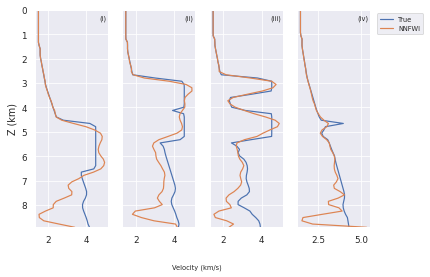

MSE = 709.608136230133
SSIM = 0.835825302751487
PSNR = 41.10144917144336


In [23]:
subdir = "NNFWI/BP_5"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 1100 result/NNFWI/BP_3/inv_10990.txt


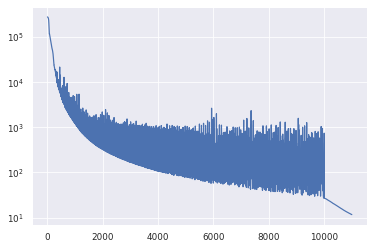

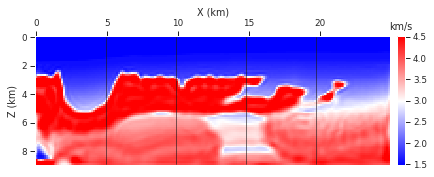

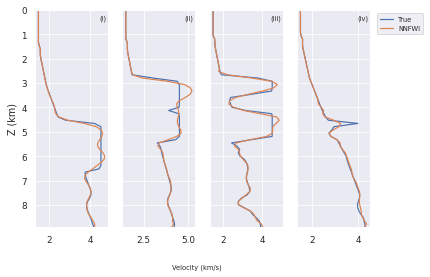

MSE = 208.73215997420908
SSIM = 0.9843941844566397
PSNR = 46.415741362919775


In [24]:
subdir = "NNFWI/BP_3"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 1100 result/NNFWI/BP_2/inv_10990.txt


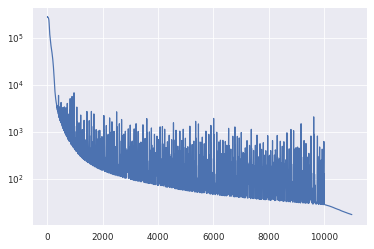

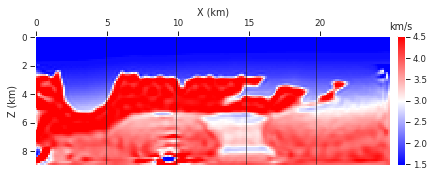

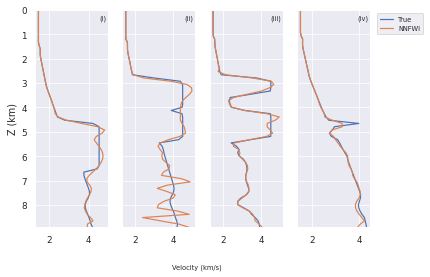

MSE = 258.3438866684349
SSIM = 0.9763723679051958
PSNR = 45.48965314476081


In [25]:
subdir = "NNFWI/BP_2"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/NNFWI/BP_BFGS/inv_04990.txt


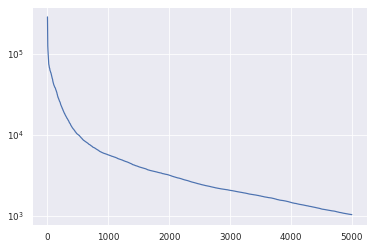

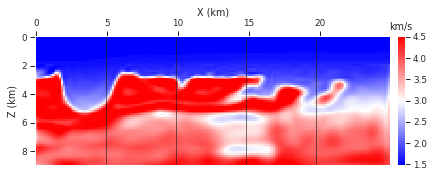

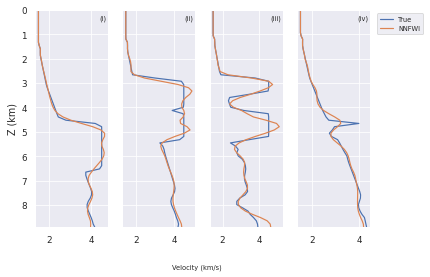

MSE = 224.7845223163071
SSIM = 0.9817856087057635
PSNR = 46.0939709923438


In [26]:
subdir = "NNFWI/BP_BFGS"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

In [27]:
# subdir = "NNFWI/BP_noise05"
# plot_subdir(subdir, model_true_BP)

In [28]:
# subdir = "NNFWI/BP_noise10"
# plot_subdir(subdir, model_true_BP)

loading 2000 result/NNFWI/BP_UQ/inv_19990.txt


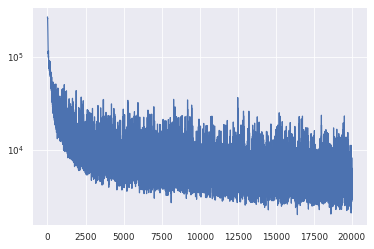

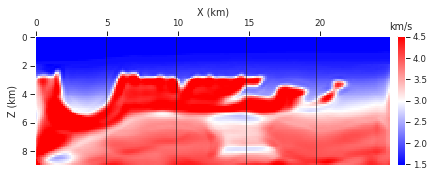

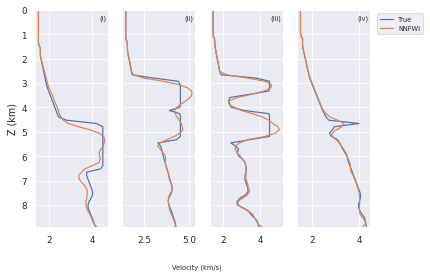

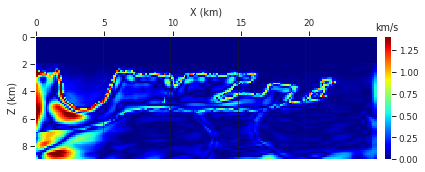

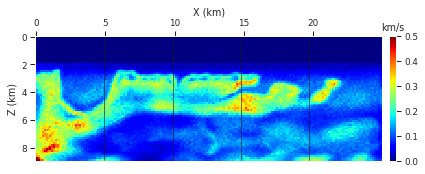

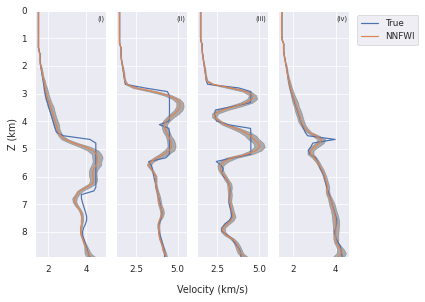

MSE = 300.4339612637357
SSIM = 0.9673872423557118
PSNR = 44.834144794762935


In [29]:
subdir = "NNFWI/BP_UQ"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr", std=True, model_smooth=model_smooth_BP,  vmax_std=0.5, vmin_std=0)
metrics(model_true_BP["vp"].T, model_inv)

loading 2000 result/NNFWI/BP_UQ_dp2/inv_19990.txt


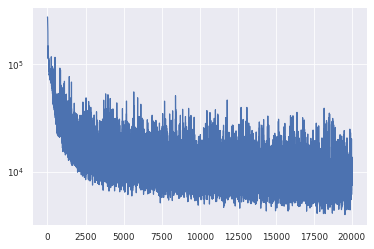

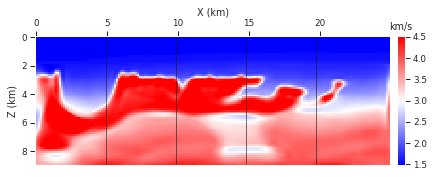

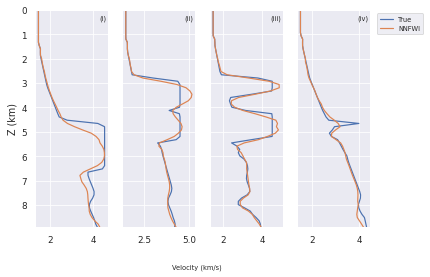

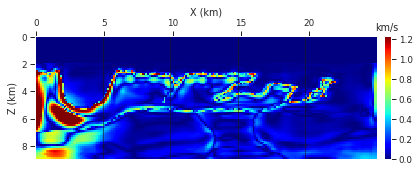

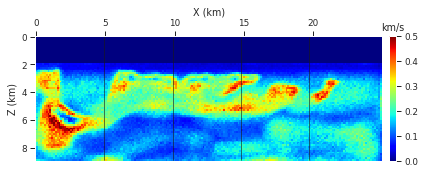

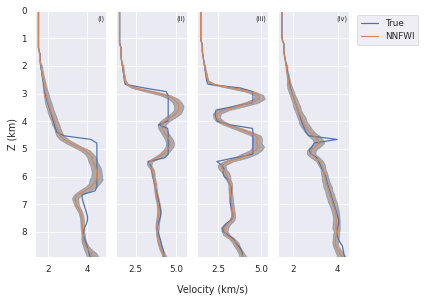

MSE = 328.1346109566272
SSIM = 0.9612671617354935
PSNR = 44.451114622521494


In [30]:
subdir = "NNFWI/BP_UQ_dp2"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr", std=True, model_smooth=model_smooth_BP, vmax_std=0.5, vmin_std=0)
metrics(model_true_BP["vp"].T, model_inv)

loading 2000 result/NNFWI/BP_UQ_3/inv_19990.txt


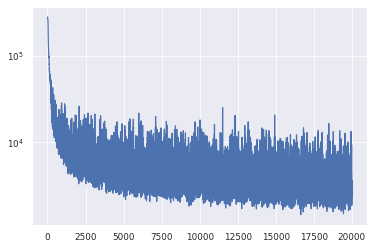

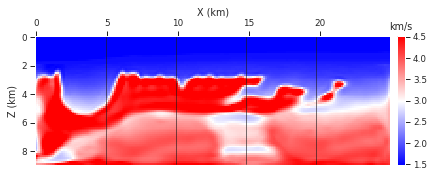

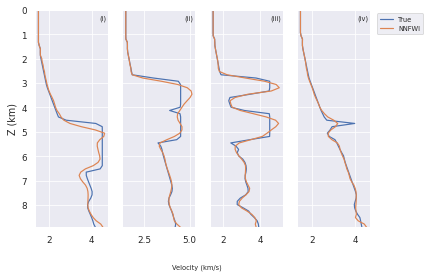

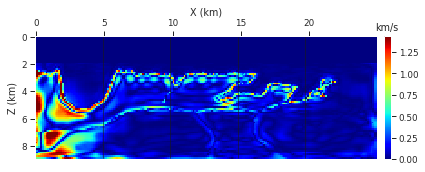

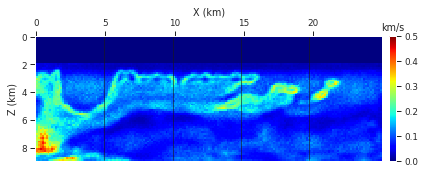

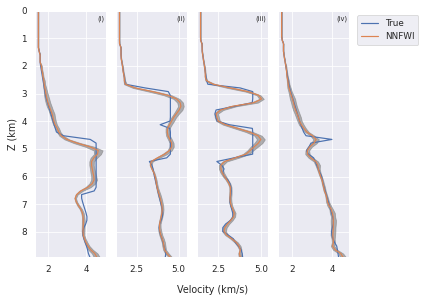

MSE = 301.07279382087296
SSIM = 0.9676919906994517
PSNR = 44.82491990887782


In [31]:
subdir = "NNFWI/BP_UQ_3"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr", std=True, model_smooth=model_smooth_BP, vmax_std=0.5, vmin_std=0)
metrics(model_true_BP["vp"].T, model_inv)

In [32]:
# subdir = "NNFWI/BP_UQ_2"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

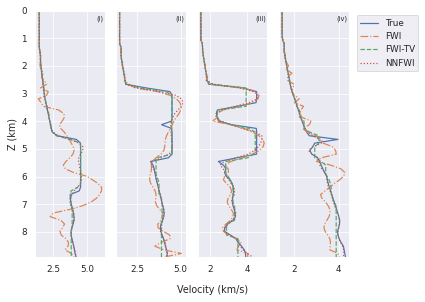

In [33]:
plot_slice(["FWI/BP",  "FWI/BP_TV_3", "NNFWI/BP" ],  model_true_BP, model_smooth_BP, fig_name = "profile_BP", names=["FWI", "FWI-TV", "NNFWI"])

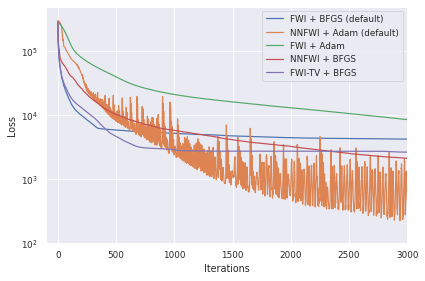

In [67]:
plt.figure()
subdirs = ["FWI/BP", "NNFWI/BP", "FWI/BP_adam", "NNFWI/BP_BFGS", "FWI/BP_TV_3"]
labels = ["FWI + BFGS (default)", "NNFWI + Adam (default)",  "FWI + Adam", "NNFWI + BFGS", "FWI-TV + BFGS"]
for i, subdir in enumerate(subdirs):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.semilogy(loss[:,0], loss[:,1], label=labels[i])
plt.xlim([-100, 3000])
plt.ylim(bottom=1e2)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.tight_layout()
# plt.savefig(fig_dir.joinpath("loss_BP.png"), bbox_inches='tight')
plt.savefig(fig_dir.joinpath("loss_BP.pdf"), bbox_inches='tight', dpi=300)
plt.show()

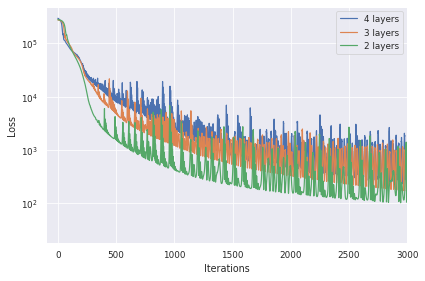

In [70]:
plt.figure()
subdirs = ["NNFWI/BP", "NNFWI/BP_3", "NNFWI/BP_2"]
labels = ["4 layers", "3 layers", "2 layers"]
for i, subdir in enumerate(subdirs):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.semilogy(loss[:,0], loss[:,1], label=labels[i])
plt.xlim([-100, 3000])
plt.ylim(bottom=1.8e1)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.tight_layout()
# plt.savefig(fig_dir.joinpath("loss_BP_layers.png"), bbox_inches='tight')
plt.savefig(fig_dir.joinpath("loss_BP_layers.pdf"), bbox_inches='tight', dpi=300)
plt.show()

In [36]:
model_true_marmousi = sio.loadmat(model_dir.joinpath("marmousi2-model-true.mat"))
model_smooth_marmousi = sio.loadmat(model_dir.joinpath("marmousi2-model-smooth.mat"))
receiver = model_true_marmousi['receiver'][0][0][0]
source = model_true_marmousi['source'][0]
vmax = np.max(model_true_marmousi['vp'])/1e3
vmin = np.min(model_true_marmousi['vp'])/1e3

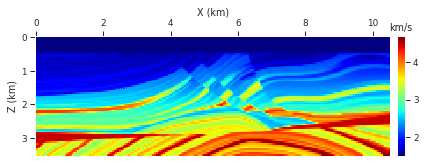

In [37]:
plot_model(model_true_marmousi, "marmousi_model_true", fig_dir)

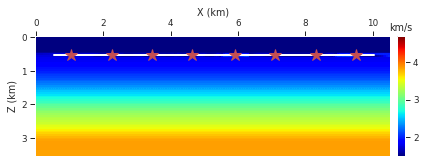

In [38]:
plot_model(model_smooth_marmousi, "marmousi_model_smooth", fig_dir, src=True, vmax=vmax, vmin=vmin)

loading 500 result/FWI/marmousi/inv_04990.txt


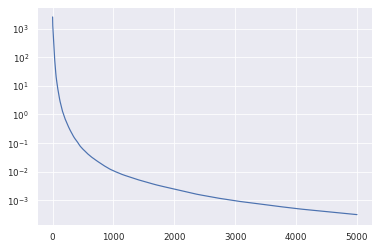

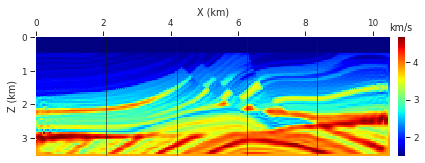

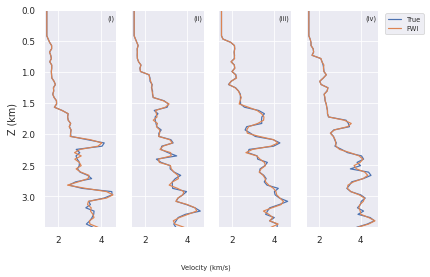

MSE = 113.77046051458039
SSIM = 0.9925487863286669
PSNR = 49.53801715418447


In [39]:
subdir = "FWI/marmousi"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_noise10/inv_04990.txt


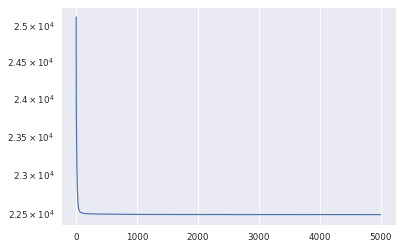

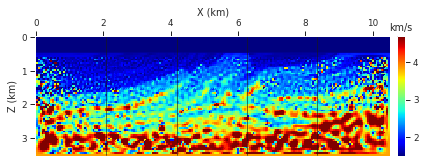

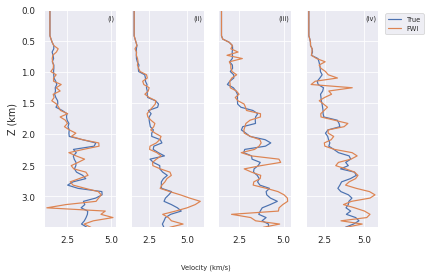

MSE = 567.7781130478014
SSIM = 0.8512880971441219
PSNR = 42.556525842805186


In [40]:
subdir = "FWI/marmousi_noise10"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_noise05/inv_04990.txt


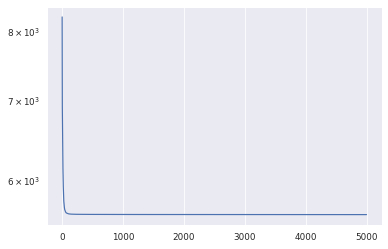

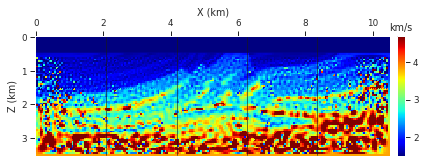

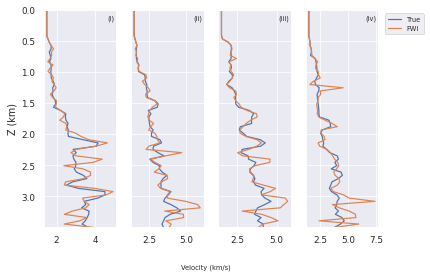

MSE = 609.5909344753937
SSIM = 0.8369520044432074
PSNR = 42.24792731650466


In [41]:
subdir = "FWI/marmousi_noise05"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_adam/inv_04990.txt


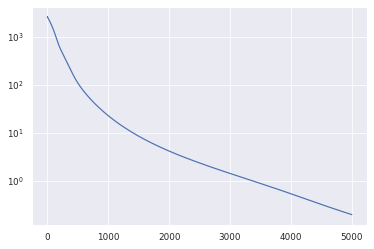

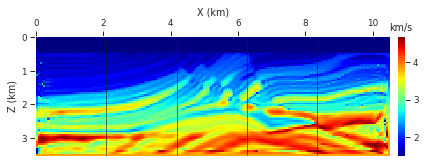

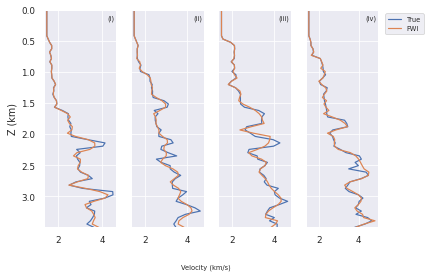

MSE = 203.85677843898173
SSIM = 0.9757921233453919
PSNR = 47.00506074676409


In [42]:
subdir = "FWI/marmousi_adam"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1100 result/NNFWI/marmousi/inv_10990.txt


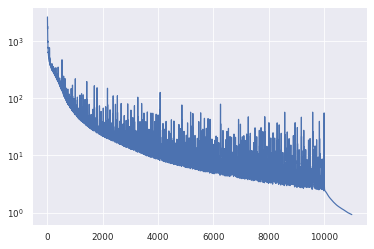

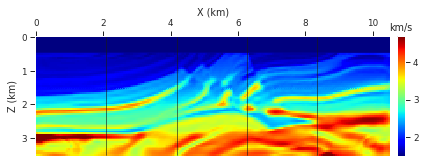

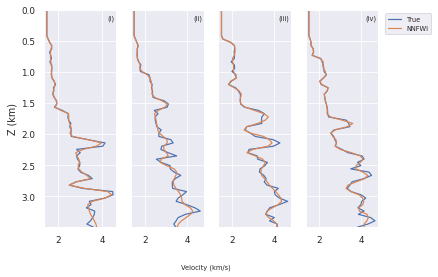

MSE = 152.5683583169305
SSIM = 0.9865140423166675
PSNR = 48.26366758311897


In [43]:
subdir = "NNFWI/marmousi"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 462 result/NNFWI/marmousi_BFGS/inv_04610.txt


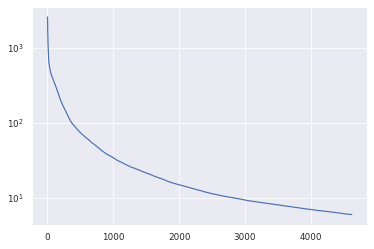

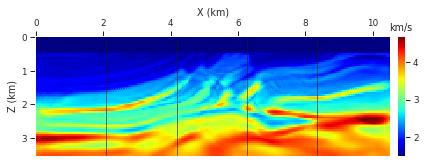

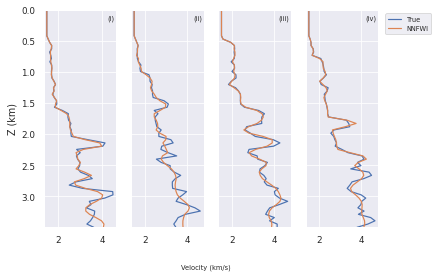

MSE = 195.72312554043938
SSIM = 0.9776251872210348
PSNR = 47.18189088948776


In [44]:
subdir = "NNFWI/marmousi_BFGS"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1100 result/NNFWI/marmousi_3/inv_10990.txt


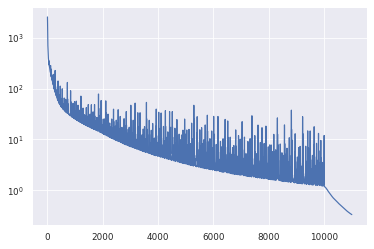

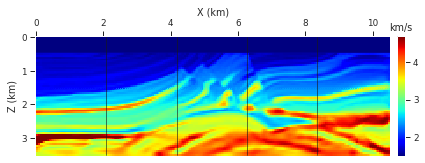

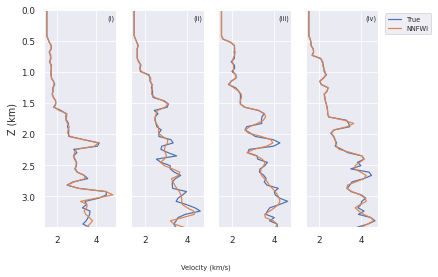

MSE = 146.8175243252199
SSIM = 0.9876366093682959
PSNR = 48.43053334812469


In [45]:
subdir = "NNFWI/marmousi_3"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1064 result/NNFWI/marmousi_2/inv_10630.txt


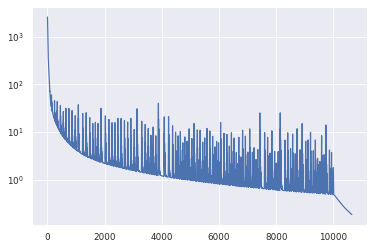

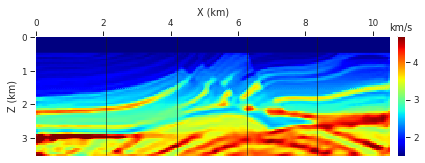

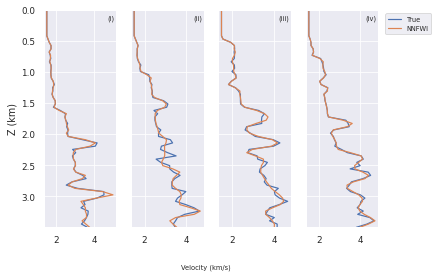

MSE = 145.99841476324053
SSIM = 0.9878086608190062
PSNR = 48.45483091142334


In [46]:
subdir = "NNFWI/marmousi_2"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1100 result/NNFWI/marmousi_noise05/inv_10990.txt


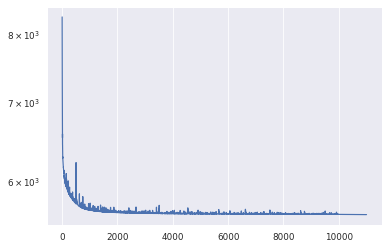

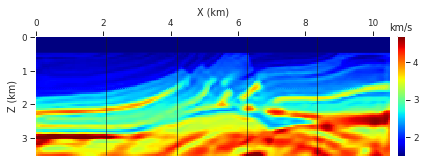

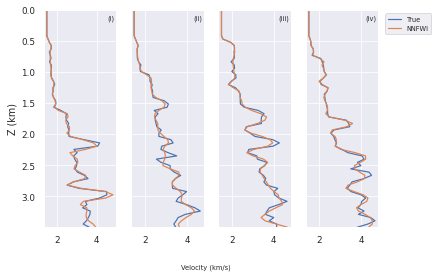

MSE = 171.25416450860953
SSIM = 0.9831792189145133
PSNR = 47.76190090085741


In [47]:
subdir = "NNFWI/marmousi_noise05"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1100 result/NNFWI/marmousi_noise10/inv_10990.txt


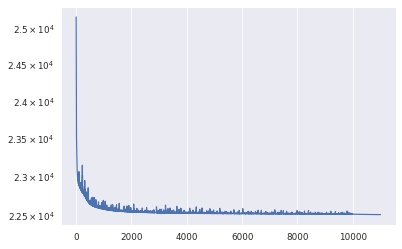

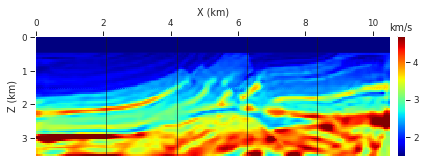

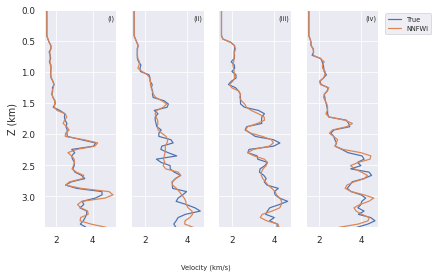

MSE = 233.44764147723373
SSIM = 0.969215145903424
PSNR = 46.41641740815093


In [48]:
subdir = "NNFWI/marmousi_noise10"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

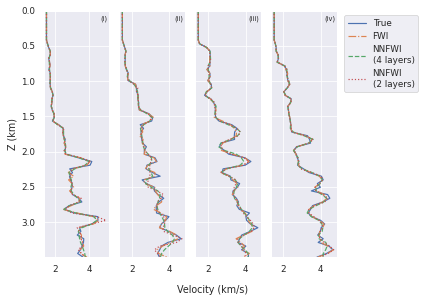

In [49]:
plot_slice(["FWI/marmousi",  "NNFWI/marmousi", "NNFWI/marmousi_2"],  model_true_marmousi,  model_smooth_marmousi, fig_name = "profile_marmousi",  names=["FWI", "NNFWI\n(4 layers)", "NNFWI\n(2 layers)"])

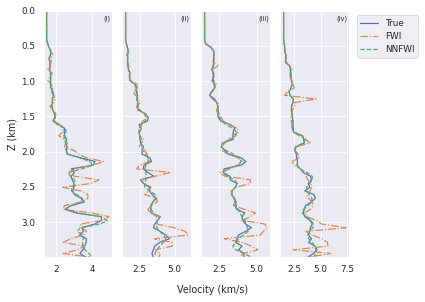

In [50]:
plot_slice(["FWI/marmousi_noise05",  "NNFWI/marmousi_noise05"], model_true_marmousi, model_smooth_marmousi, fig_name = "profile_marmousi_noise05", names=["FWI", "NNFWI"])

loading 1868 result/NNFWI/marmousi_UQ/inv_18670.txt


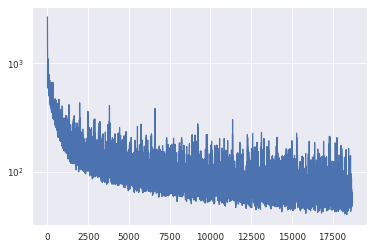

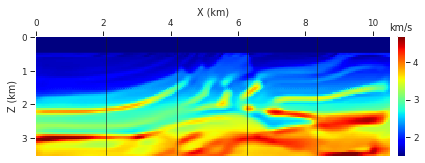

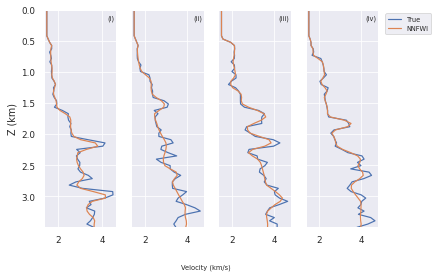

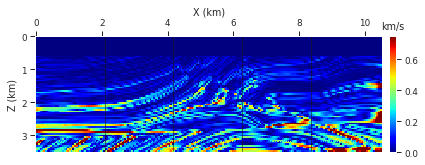

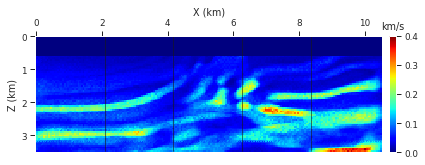

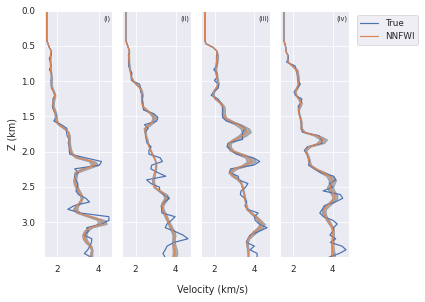

MSE = 203.93506556885566
SSIM = 0.97553044374543
PSNR = 47.00339324559036


In [51]:
subdir = "NNFWI/marmousi_UQ"
model_inv = plot_subdir(subdir, model_true_marmousi, std=True, model_smooth=model_smooth_marmousi, vmax_std=0.4, vmin_std=0)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 1859 result/NNFWI/marmousi_UQ_dp2/inv_18580.txt


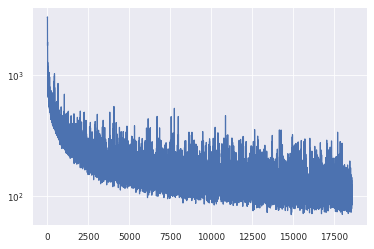

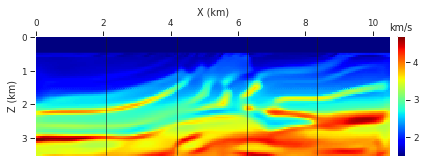

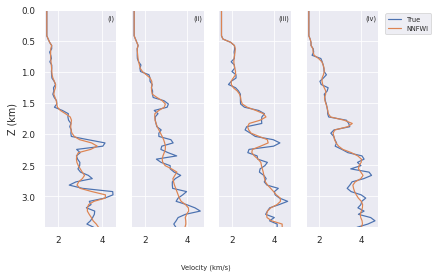

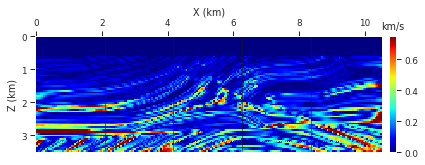

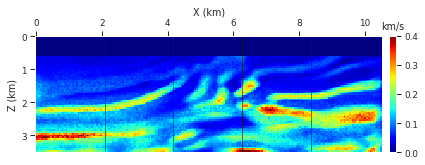

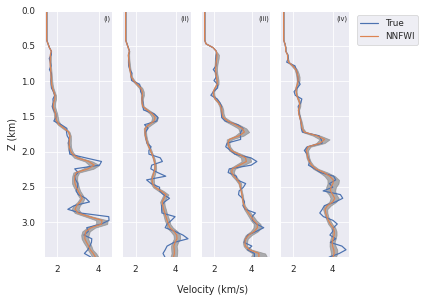

MSE = 213.8868563808879
SSIM = 0.9730115704155479
PSNR = 46.79647133980891


In [52]:
subdir = "NNFWI/marmousi_UQ_dp2"
model_inv = plot_subdir(subdir, model_true_marmousi, std=True, model_smooth=model_smooth_marmousi, vmax_std=0.4, vmin_std=0)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 2000 result/NNFWI/marmousi_UQ_3/inv_19990.txt


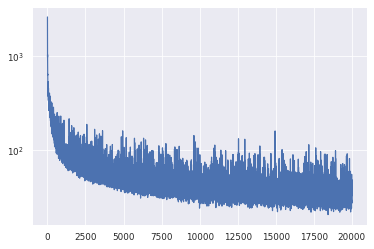

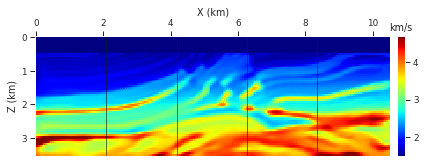

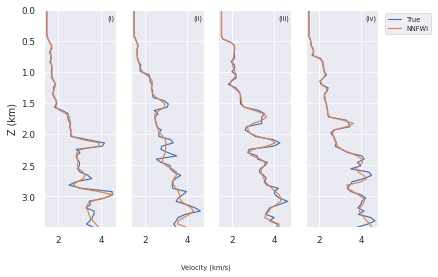

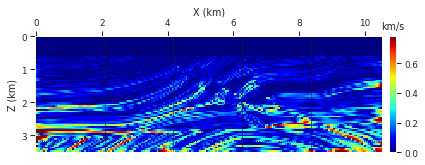

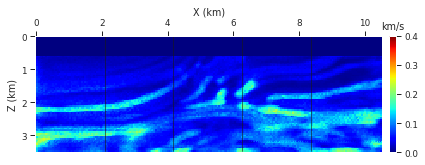

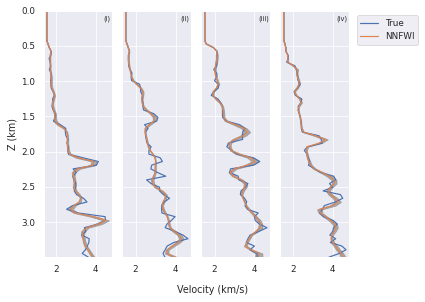

MSE = 185.68212435152344
SSIM = 0.9799794054938451
PSNR = 47.4106113527325


In [53]:
subdir = "NNFWI/marmousi_UQ_3"
model_inv = plot_subdir(subdir, model_true_marmousi, std=True, model_smooth=model_smooth_marmousi, vmax_std=0.4, vmin_std=0)
metrics(model_true_marmousi["vp"].T, model_inv)

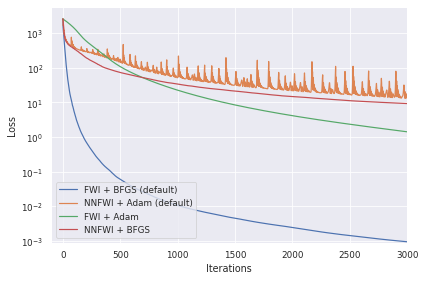

In [73]:
plt.figure()
subdirs = ["FWI/marmousi", "NNFWI/marmousi", "FWI/marmousi_adam", "NNFWI/marmousi_BFGS"]
labels = ["FWI + BFGS (default)", "NNFWI + Adam (default)",  "FWI + Adam", "NNFWI + BFGS"]
for i, subdir in enumerate(subdirs):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.semilogy(loss[:,0], loss[:,1], label=labels[i])
plt.xlim([-100, 3000])
plt.ylim(bottom=9e-4)
plt.legend(loc="lower left")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.tight_layout()
# plt.savefig(fig_dir.joinpath("loss_marmousi.png"), bbox_inches='tight')
plt.savefig(fig_dir.joinpath("loss_marmousi.pdf"), bbox_inches='tight', dpi=300)
plt.show()

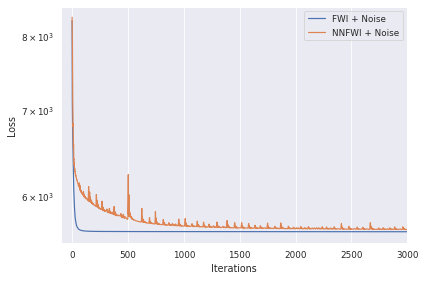

In [55]:
plt.figure()
subdirs = ["FWI/marmousi_noise05", "NNFWI/marmousi_noise05"]#, "FWI/marmousi_noise10", "NNFWI/marmousi_noise10"]
labels = ["FWI + Noise", "NNFWI + Noise"]#,  "FWI + Noise", "NNFWI + Noise"]
for i, subdir in enumerate(subdirs):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.semilogy(loss[:,0], loss[:,1], label=labels[i])
plt.xlim([-100, 3000])
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.tight_layout()
# plt.savefig(fig_dir.joinpath("loss_marmousi_noise05.png"), bbox_inches='tight')
plt.savefig(fig_dir.joinpath("loss_marmousi_noise05.pdf"), bbox_inches='tight', dpi=300)
plt.show()

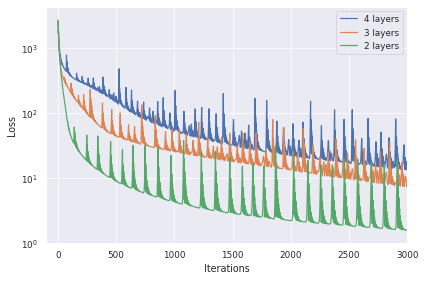

In [74]:
plt.figure()
subdirs = ["NNFWI/marmousi", "NNFWI/marmousi_3", "NNFWI/marmousi_2"]
labels = ["4 layers", "3 layers", "2 layers"]
for i, subdir in enumerate(subdirs):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.semilogy(loss[:,0], loss[:,1], label=labels[i])
plt.xlim([-100, 3000])
plt.ylim(bottom=1e0)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.tight_layout()
# plt.savefig(fig_dir.joinpath("loss_marmousi_layers.png"), bbox_inches='tight')
plt.savefig(fig_dir.joinpath("loss_marmousi_layers.pdf"), bbox_inches='tight', dpi=300)
plt.show()

In [57]:
# plot_slice(["FWI/marmousi", "NNFWI/marmousi"], model_true_marmousi)

In [58]:
# subdir = "NNFWI/marmousi_UQ"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [59]:
# subdir = "NNFWI/marmousi_UQ_2"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [60]:
# subdir = "NNFWI/marmousi_BFGS"
# plot_subdir(subdir)

In [61]:
# subdir = "PhysGNN/marmousi"
# plot_subdir(subdir)

In [62]:
model_true_marmousi_large = sio.loadmat(model_dir.joinpath("marmousi2-model-true-large.mat"))
model_smooth_marmousi_large = sio.loadmat(model_dir.joinpath("marmousi2-model-smooth-large.mat"))
receiver = model_true_marmousi_large['receiver'][0][0][0]
source = model_true_marmousi_large['source'][0]
vmax = np.max(model_true_marmousi_large['vp'])/1e3
vmin = np.min(model_true_marmousi_large['vp'])/1e3

loading 44 result/FWI/marmousi_large/inv_00430.txt


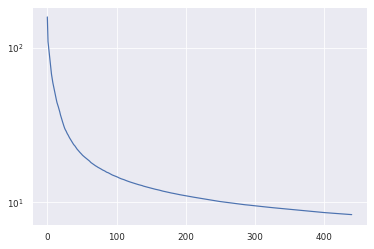

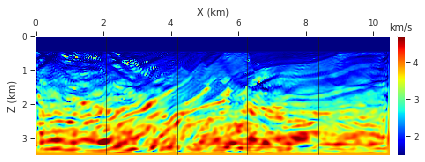

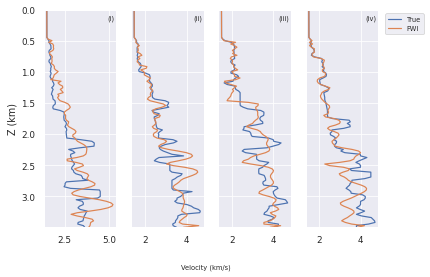

MSE = 502.94377488714036
SSIM = 0.8525807564373102
PSNR = 43.08780519538341


In [63]:
subdir = "FWI/marmousi_large"
model_inv = plot_subdir(subdir, model_true_marmousi_large)
metrics(model_true_marmousi_large["vp"].T, model_inv)

loading 4 result/NNFWI/marmousi_large/inv_00030.txt


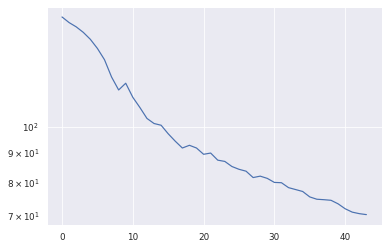

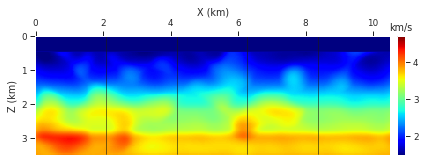

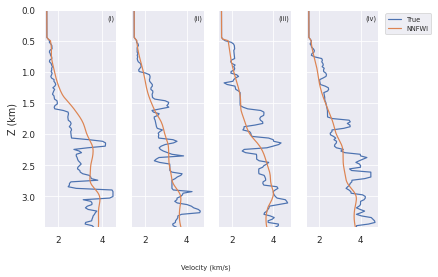

MSE = 430.65747178242066
SSIM = 0.8853949230910354
PSNR = 43.76167970138766


In [64]:
subdir = "NNFWI/marmousi_large"
model_inv = plot_subdir(subdir, model_true_marmousi_large)
metrics(model_true_marmousi_large["vp"].T, model_inv)